In [2]:
import numpy as np
import pandas as pd
import subprocess

version_output = subprocess.check_output(["python", "--version"]).decode("utf-8")
print(f"Using Python version: {version_output.strip()}")

Using Python version: Python 3.10.15


In [7]:
def compute_angle(joint0_x, joint0_y, joint1_x, joint1_y, joint2_x, joint2_y):
    # Compute vectors
    vector1 = np.array([joint0_x - joint1_x, joint0_y - joint1_y])
    vector2 = np.array([joint2_x - joint1_x, joint2_y - joint1_y])

    # Compute dot product and magnitudes
    dot_product = np.dot(vector1, vector2)
    magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)

    # Compute cosine of the angle
    cos_theta = dot_product / magnitude_product

    # Compute angle in radians
    angle_rad = np.arccos(cos_theta)

    # Convert angle from radians to degrees
    angle_deg = np.degrees(angle_rad)

    return angle_deg

In [8]:
file_name = "joints_data_30fps"

In [ ]:
original_df = pd.read_csv(f"{file_name}.csv")
original_df

In [10]:
def convert_to_angles(input_csv, output_csv):
    angle_pairs = [
        ("nose", "left_shoulder", "left_elbow"),
        ("left_shoulder", "left_elbow", "left_wrist"),
        ("nose", "right_shoulder", "right_elbow"),
        ("right_shoulder", "right_elbow", "right_wrist"),
        ("nose", "left_hip", "left_knee"),
        ("left_hip", "left_knee", "left_ankle"),
        ("nose", "right_hip", "right_knee"),
        ("right_hip", "right_knee", "right_ankle"),
    ]

    # Generate new column headers based on the pairs of joints
    new_column_headers = [
        f"angle between {pair[0]}_to_{pair[1]}_to_{pair[2]}" for pair in angle_pairs
    ]
    new_df = pd.DataFrame(
        columns=["category", "video_id", "frame_number"] + new_column_headers
    )

    original_df = pd.read_csv(input_csv)

    print(f"Total Rows: {len(original_df)}")

    for index, row in original_df.iterrows():

        # if index < 1000:
        print(f"currently on index: {index}")

        angles = []

        for pair in angle_pairs:
            joint0_x = row[pair[0] + "_x"]
            joint0_y = row[pair[0] + "_y"]
            joint1_x = row[pair[1] + "_x"]
            joint1_y = row[pair[1] + "_y"]
            joint2_x = row[pair[2] + "_x"]
            joint2_y = row[pair[2] + "_y"]

            angles.append(
                compute_angle(
                    joint0_x, joint0_y, joint1_x, joint1_y, joint2_x, joint2_y
                )
            )

        new_df.loc[index] = [
            row["category"],
            row["video_id"],
            row["frame_number"],
        ] + angles

    new_df.to_csv(output_csv)

# Converting data of joints to angle between body joints

In [ ]:
input_csv = "joints_data_30fps.csv"
output_csv_path = "angles_between_joints_30fps.csv"

convert_to_angles(input_csv, output_csv_path)

# Model

In [12]:
import numpy as np
import pandas as pd
import os

In [13]:
new_file_name = f"angles_between_joints_30fps"

data = pd.read_csv(f"{new_file_name}.csv")

categories = data["category"].unique()

print(categories)

['Archery' 'BalanceBeam' 'BasketBall' 'Biking' 'BodyWeightSquats'
 'Bowling' 'CleanAndJerk' 'Diving' 'Golf Swing' 'HammerThrow'
 'HandstandPushups' 'Horse Riding' 'HulaHoop' 'JumpRope' 'JumpingJack'
 'Lunges' 'PullUps' 'PushUps' 'Skiing' 'Soccer Juggling' 'Swing'
 'Tennis Swing' 'ThrowDiscus' 'Trampoline Jumping' 'VolleyBall Spiking'
 'Walking']


In [14]:
X = data["category"]

categories_to_keep = [
    "Archery",
    "BodyWeightSquats",
    "CleanAndJerk",
    "HammerThrow",
    "HandstandPushups",
    "ThrowDiscus",
    "Lunges",
]

data = data[data["category"].isin(categories_to_keep)]

data.head()
# data.tail()

Unnamed: 0 category           video_id  frame_number  \
0           0  Archery  v_Archery_g01_c01             0   
1           1  Archery  v_Archery_g01_c01             1   
2           2  Archery  v_Archery_g01_c01             2   
3           3  Archery  v_Archery_g01_c01             3   
4           4  Archery  v_Archery_g01_c01             4   

   angle between nose_to_left_shoulder_to_left_elbow  \
0                                         116.995271   
1                                         117.988234   
2                                         116.534254   
3                                         110.496314   
4                                         108.228559   

   angle between left_shoulder_to_left_elbow_to_left_wrist  \
0                                         133.721516         
1                                         128.509424         
2                                         124.332419         
3                                         128.189390         
4                                         120.407164         

   angle between nose_to_right_shoulder_to_right_elbow  \
0                                         160.309923     
1                                         143.545243     
2                                         116.024857     
3                                          48.525573     
4                                          29.297864     

   angle between right_shoulder_to_right_elbow_to_right_wrist  \
0                                          69.220591            
1                                          81.451284            
2                                         122.824863            
3                                          89.584801            
4                                         126.046312            

   angle between nose_to_left_hip_to_left_knee  \
0                                    89.772494   
1                                    40.345511   
2                                    86.508974   
3                                    16.417933   
4                                    70.648176   

   angle between left_hip_to_left_knee_to_left_ankle  \
0                                          96.596201   
1                                         168.839316   
2                                          99.541752   
3                                         127.485632   
4                                          46.926454   

   angle between nose_to_right_hip_to_right_knee  \
0                                      82.998280   
1                                      52.462520   
2                                      70.261983   
3                                      58.939753   
4                                      68.109062   

   angle between right_hip_to_right_knee_to_right_ankle  
0                                          57.665737     
1                                          88.758881     
2                                          77.971726     
3                                          99.453557     
4                                          76.151421

In [15]:
# Get unique categories
categories = data["category"].unique()

print(categories)

['Archery' 'BodyWeightSquats' 'CleanAndJerk' 'HammerThrow'
 'HandstandPushups' 'Lunges' 'ThrowDiscus']


In [16]:
import shutil

# Deleting Data Folder
if os.path.exists("Data"):
    shutil.rmtree("Data")

if not os.path.exists("Data"):
    print(categories)

    # Create a folder for each category
    for category in categories:
        category_folder = os.path.join("Data", category)
        os.makedirs(category_folder, exist_ok=True)

        # Filter data for the current category
        category_data = data[data["category"] == category]

        # Get unique video IDs
        video_ids = category_data["video_id"].unique()

        # Iterate over each video ID
        for video_id in video_ids:
            video_folder = os.path.join(category_folder, video_id)
            os.makedirs(video_folder, exist_ok=True)

            # Filter data for the current video ID
            video_data = category_data[category_data["video_id"] == video_id]

            # Initialize a counter for numbering the .npy files
            file_counter = 0

            # Iterate over each row in video_data
            for index, row in video_data.iterrows():
                # Extract coordinates
                coordinates = row.values[4:].flatten()

                # Create numpy array
                np_array = np.array(coordinates)

                # Save numpy array
                np.save(os.path.join(video_folder, f"{file_counter}.npy"), np_array)

                # Increment file_counter
                file_counter += 1

['Archery' 'BodyWeightSquats' 'CleanAndJerk' 'HammerThrow'
 'HandstandPushups' 'Lunges' 'ThrowDiscus']


In [17]:
import pickle

label_map = {label: num for num, label in enumerate(categories)}

with open("label_map.pkl", "wb") as f:
    pickle.dump(label_map, f)

label_map

{'Archery': 0,
 'BodyWeightSquats': 1,
 'CleanAndJerk': 2,
 'HammerThrow': 3,
 'HandstandPushups': 4,
 'Lunges': 5,
 'ThrowDiscus': 6}

In [18]:
from natsort import natsorted

sequences, labels = [], []

if os.path.exists("Data"):
    for category in sorted(os.listdir("Data")):

        dir_path = os.path.join("Data", category)
        if os.path.isdir(dir_path):
            for video_folder in natsorted(os.listdir(dir_path)):
                window = []
                video_folder_dir = os.path.join(dir_path, video_folder)
                if os.path.isdir(video_folder_dir):
                    for frame_info in natsorted(os.listdir(video_folder_dir)):
                        frame_info_dir = os.path.join(video_folder_dir, frame_info)
                        if os.path.isfile(frame_info_dir):
                            # print(frame_info_dir)
                            res = np.load(frame_info_dir, allow_pickle=True)
                            # if res.shape != (9,):
                            #     print(res.shape)

                            # print(res)
                            window.append(res)

                    sequences.append(window)
                    labels.append(label_map[category])

In [19]:
print(len(sequences))
print(len(labels))

853
853


In [20]:
from keras.utils import to_categorical

X = np.array(sequences)
y = to_categorical(labels).astype(int)
print(y.shape)

(853, 7)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

print(X_train.shape)
print(y_train.shape)
# {no of videos, no of frames per video, no of angles per frame}
print(X_test.shape)
print(y_test.shape)

(767, 30, 8)
(767, 7)
(86, 30, 8)
(86, 7)


In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [23]:
print(tf.config.list_physical_devices())
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
# Using Tensorboard

log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [25]:
print(np.array(sequences).shape)
print(np.array(sequences).shape[1])
print(np.array(sequences).shape[2])

(853, 30, 8)
30
8


In [26]:
print(categories.shape[0])  # 7

7


In [27]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")

## Defining Model

In [28]:
model = Sequential()

model.add(
    LSTM(
        64,
        return_sequences=True,
        activation="tanh",
        input_shape=(np.array(sequences).shape[1], np.array(sequences).shape[2]),
    )
)
model.add(LSTM(128, return_sequences=True, activation="tanh"))
model.add(LSTM(64, return_sequences=False, activation="tanh"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(categories.shape[0], activation="softmax"))


print(X.shape)
print(categories.shape[0])
print(y_train.shape)
print(model.summary())

2024-10-22 08:08:43.373101: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-22 08:08:43.373187: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-22 08:08:43.373609: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-22 08:08:43.373633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-22 08:08:43.373651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/ayushsinghal/Desktop/ML/Human-Activity-Recognition/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` arg

(853, 30, 8)
7
(767, 7)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,383 (677.28 KB)

 Trainable params: 173,383 (677.28 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(
    optimizer="Adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"]
)

In [ ]:
print(tf.config.list_physical_devices())

## Training the Model

In [ ]:
no_of_epochs = 100

# with tf.device("/gpu:0"):
# model.fit(X_train, y_train, epochs=no_of_epochs, callbacks=[tb_callback])

In [ ]:
print(y_train.shape)
print(X_test.shape)

# Saving Model

In [ ]:
# model.save(f"final_model.keras")

## Get different metrics of model

In [6]:
def getDataAndLabels():
    import os
    import numpy as np
    import pandas as pd
    import shutil
    from natsort import natsorted
    from keras.utils import to_categorical

    new_file_name = "angles_between_joints_30fps"

    data = pd.read_csv(f"{new_file_name}.csv")

    X = data["category"]

    categories_to_keep = [
        "Archery",
        "BodyWeightSquats",
        "CleanAndJerk",
        "HammerThrow",
        "HandstandPushups",
        "ThrowDiscus",
        "Lunges",
    ]

    data = data[data["category"].isin(categories_to_keep)]

    categories = data["category"].unique()

    # Deleting Data Folder
    if os.path.exists("Data"):
        shutil.rmtree("Data")

    if not os.path.exists("Data"):
        print(categories)

        # Create a folder for each category
        for category in categories:
            category_folder = os.path.join("Data", category)
            os.makedirs(category_folder, exist_ok=True)

            # Filter data for the current category
            category_data = data[data["category"] == category]

            # Get unique video IDs
            video_ids = category_data["video_id"].unique()

            # Iterate over each video ID
            for video_id in video_ids:
                video_folder = os.path.join(category_folder, video_id)
                os.makedirs(video_folder, exist_ok=True)

                # Filter data for the current video ID
                video_data = category_data[category_data["video_id"] == video_id]

                # Initialize a counter for numbering the .npy files
                file_counter = 0

                # Iterate over each row in video_data
                for index, row in video_data.iterrows():
                    # Extract coordinates
                    coordinates = row.values[4:].flatten()

                    # Create numpy array
                    np_array = np.array(coordinates)

                    # Save numpy array
                    np.save(os.path.join(video_folder, f"{file_counter}.npy"), np_array)

                    # Increment file_counter
                    file_counter += 1

    label_map = {label: num for num, label in enumerate(categories)}

    sequences, labels = [], []

    if os.path.exists("Data"):
        for category in sorted(os.listdir("Data")):

            dir_path = os.path.join("Data", category)
            if os.path.isdir(dir_path):
                for video_folder in natsorted(os.listdir(dir_path)):
                    window = []
                    video_folder_dir = os.path.join(dir_path, video_folder)
                    if os.path.isdir(video_folder_dir):
                        for frame_info in natsorted(os.listdir(video_folder_dir)):
                            frame_info_dir = os.path.join(video_folder_dir, frame_info)
                            if os.path.isfile(frame_info_dir):
                                # print(frame_info_dir)
                                res = np.load(frame_info_dir, allow_pickle=True)
                                # if res.shape != (9,):
                                #     print(res.shape)

                                # print(res)
                                window.append(res)

                        sequences.append(window)
                        labels.append(label_map[category])

    X = np.array(sequences)
    y = to_categorical(labels).astype(int)

    X = X.astype("float32")
    y = y.astype("float32")

    return X, y

In [7]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


def get_accuracy_scores_for_each_category(predicted_values, true_values):
    # Calculate overall accuracy score
    overall_score = accuracy_score(predicted_values, true_values)
    print("Overall Accuracy Score:", overall_score)

    # Calculate multilabel confusion matrix
    confusion_matrices = multilabel_confusion_matrix(true_values, predicted_values)

    reversed_label_map = {value: key for key, value in label_map.items()}

    # Calculate accuracy score for each category
    category_scores = []
    for i, cm in enumerate(confusion_matrices):
        tn, fp, fn, tp = cm.ravel()
        category_accuracy = (tp + tn) / (tp + tn + fp + fn)
        category_scores.append(category_accuracy)
        print(
            f"Accuracy Score for Category '{reversed_label_map[i]}' is: {category_accuracy}"
        )

In [8]:
from sklearn.metrics import (
    multilabel_confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


# Convert predicted and true labels to categorical values (indices of maximum probability)
def get_metrics_of_model(predicted_values, true_values):
    results = [np.argmax(re) for re in predicted_values]
    real_results = [np.argmax(re) for re in true_values]

    # Calculate overall accuracy score
    overall_score = accuracy_score(results, real_results)
    print("Overall Accuracy Score:", overall_score)

    # Calculate multilabel confusion matrix
    confusion_matrices = multilabel_confusion_matrix(real_results, results)

    reversed_label_map = {value: key for key, value in label_map.items()}

    # Calculate accuracy, precision, recall, and F1-score for each category
    for i, cm in enumerate(confusion_matrices):
        tn, fp, fn, tp = cm.ravel()
        category_precision = precision_score(
            real_results, results, labels=[i], average="micro"
        )
        category_recall = recall_score(
            real_results, results, labels=[i], average="micro"
        )
        category_f1 = f1_score(real_results, results, labels=[i], average="micro")
        print(f"Metrics for Category '{reversed_label_map[i]}':")
        print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn)}")
        print(f"Precision: {category_precision}")
        print(f"Recall: {category_recall}")
        print(f"F1-score: {category_f1}")

In [9]:
from sklearn.model_selection import train_test_split

X, y = getDataAndLabels()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")

['Archery' 'BodyWeightSquats' 'CleanAndJerk' 'HammerThrow'
 'HandstandPushups' 'Lunges' 'ThrowDiscus']


In [10]:
model = None

In [11]:
import numpy as np
import pickle

if "model" not in locals() or model is None:
    from keras.models import load_model

    print("Loading saved model")
    model = load_model("final_model.keras")

with open("label_map.pkl", "rb") as f:
    label_map = pickle.load(f)

predicted_values = model.predict(X_test)

predicted_results = [np.argmax(re) for re in predicted_values]
true_results = [np.argmax(re) for re in y_test]

get_accuracy_scores_for_each_category(
    predicted_values=predicted_results, true_values=true_results
)
print()
get_metrics_of_model(predicted_values=predicted_results, true_values=true_results)

Loading saved model


2024-10-22 08:20:32.734749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step
Overall Accuracy Score: 0.7209302325581395
Accuracy Score for Category 'Archery' is: 0.9302325581395349
Accuracy Score for Category 'BodyWeightSquats' is: 0.8953488372093024
Accuracy Score for Category 'CleanAndJerk' is: 0.9651162790697675
Accuracy Score for Category 'HammerThrow' is: 0.8488372093023255
Accuracy Score for Category 'HandstandPushups' is: 0.9883720930232558
Accuracy Score for Category 'Lunges' is: 0.9418604651162791
Accuracy Score for Category 'ThrowDiscus' is: 0.872093023255814

Overall Accuracy Score: 1.0
Metrics for Category 'Archery':
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Creating Visualizations

/var/folders/gq/412r46197lg319r1qkpq_xqh0000gn/T/ipykernel_27085/2661681374.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(reversed_label_map.values(), rotation=45, ha="right")


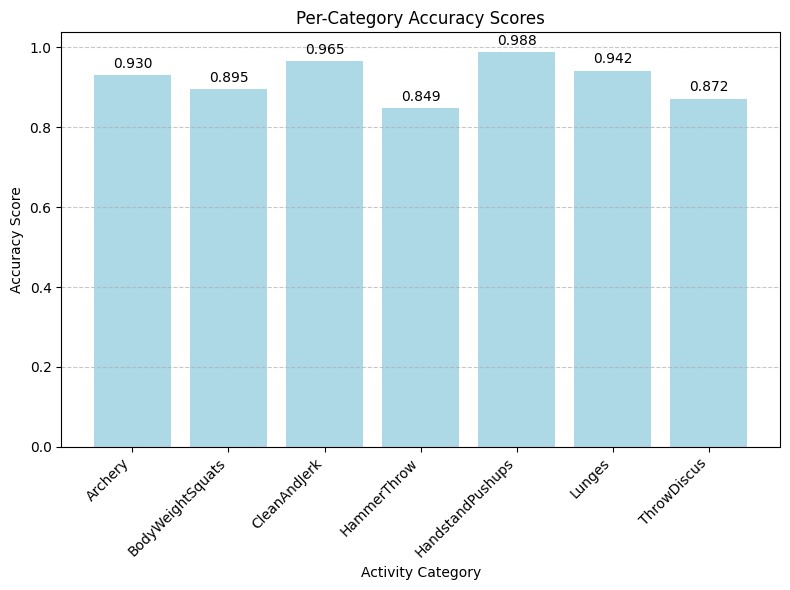

In [12]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import multilabel_confusion_matrix

with open("label_map.pkl", "rb") as f:
    label_map = pickle.load(f)
reversed_label_map = {value: key for key, value in label_map.items()}

confusion_matrices = multilabel_confusion_matrix(true_results, predicted_results)

# Calculate accuracy score for each category
category_scores = []
for i, cm in enumerate(confusion_matrices):  # cm = confusion_matrix
    tn, fp, fn, tp = cm.ravel()
    category_accuracy = (tp + tn) / (tp + tn + fp + fn)
    category_scores.append(category_accuracy)

# Accuracy
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(reversed_label_map.values(), category_scores, color="lightblue")

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        "{:.3f}".format(height),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

ax.set_xlabel("Activity Category")
ax.set_ylabel("Accuracy Score")
ax.set_title("Per-Category Accuracy Scores")
ax.set_xticklabels(reversed_label_map.values(), rotation=45, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
precision for category Archery is: 0.9090909090909091
recall for category Archery is: 0.6666666666666666
precision for category BodyWeightSquats is: 0.625
recall for category BodyWeightSquats is: 0.45454545454545453
precision for category CleanAndJerk is: 0.8
recall for category CleanAndJerk is: 0.8888888888888888
precision for category HammerThrow is: 0.5416666666666666
recall for category HammerThrow is: 0.8666666666666667
precision for category HandstandPushups is: 1.0
recall for category HandstandPushups is: 0.9090909090909091
precision for category Lunges is: 0.8181818181818182
recall for category Lunges is: 0.75
precision for category ThrowDiscus is: 0.5833333333333334
recall for category ThrowDiscus is: 0.5384615384615384


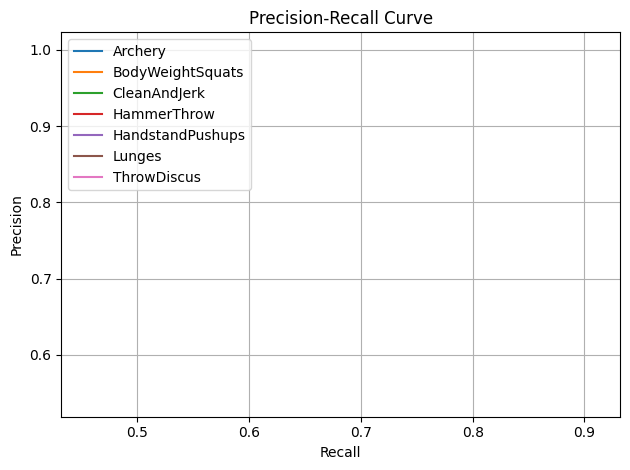

In [13]:
from sklearn.metrics import precision_score

if "model" not in locals() or model is None:
    from keras.models import load_model

    model = load_model("my_model_fot_test.h5")

predicted_values = model.predict(X_test)

predicted_results = [np.argmax(re) for re in predicted_values]
true_results = [np.argmax(re) for re in y_test]

# Assuming 'real_results' and 'results' contain true and predicted labels

for i, category in enumerate(reversed_label_map.values()):
    category_precision = precision_score(
        true_results, predicted_results, labels=[i], average="micro"
    )
    category_recall = recall_score(
        true_results, predicted_results, labels=[i], average="micro"
    )

    print(f"precision for category {category} is: {category_precision}")
    print(f"recall for category {category} is: {category_recall}")

    plt.plot(category_recall, category_precision, label=category)
    # plt.plot(100, 200, label="wdoin")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


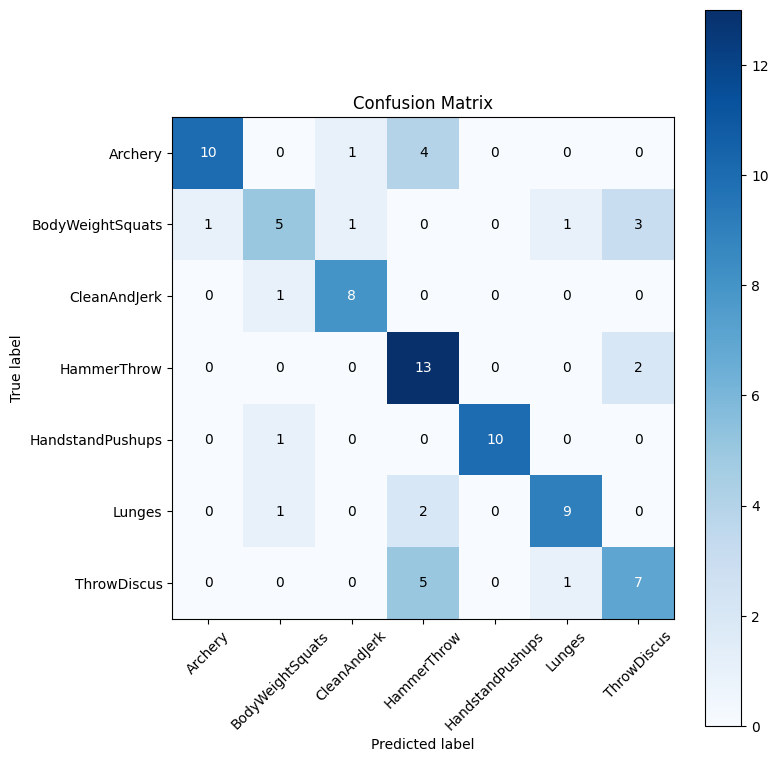

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

if "model" not in locals() or model is None:
    from keras.models import load_model

    model = load_model("my_model_fot_test.h5")

predicted_values = model.predict(X_test)

predicted_results = [np.argmax(re) for re in predicted_values]
true_results = [np.argmax(re) for re in y_test]

# Assuming 'real_results' and 'results' contain true and predicted labels

# Compute confusion matrix
cm = confusion_matrix(true_results, predicted_results)

# Get the number of classes
num_classes = cm.shape[0]

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, reversed_label_map.values(), rotation=45)
plt.yticks(tick_marks, reversed_label_map.values())

# Display values in each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(
            j,
            i,
            format(cm[i, j], "d"),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Start from here

# Testing on custom videos

In [10]:
import tensorflow as tf

print(tf.config.list_physical_devices())
tf.debugging.experimental.disable_dump_debug_info()
tf.debugging.set_log_device_placement(False)
tf.get_logger().setLevel(3)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
from keras.models import load_model

model = load_model("final_model.keras")

In [12]:
def compute_angle(joint0_x, joint0_y, joint1_x, joint1_y, joint2_x, joint2_y):
    # Compute vectors
    vector1 = np.array([joint0_x - joint1_x, joint0_y - joint1_y])
    vector2 = np.array([joint2_x - joint1_x, joint2_y - joint1_y])

    # Compute dot product and magnitudes
    dot_product = np.dot(vector1, vector2)
    magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)

    # Compute cosine of the angle
    # cos_theta = dot_product / magnitude_product
    cos_theta = max(min(dot_product / magnitude_product, 1), -1)

    # Compute angle in radians
    angle_rad = np.arccos(cos_theta)
    if np.isnan(angle_rad):
        print(
            f"Invalid cosine angle, cos_theta: {cos_theta}, dot_product: {dot_product}, magnitude_product: {magnitude_product}"
        )
    # else:
    #     print(f"cos_theta: {cos_theta}, angle (rad): {angle_rad}")

    # Convert angle from radians to degrees
    angle_deg = np.degrees(angle_rad)

    return angle_deg

In [13]:
def get_angles_from_keypoints(keypoints):
    angle_pairs = [
        ("nose", "left_shoulder", "left_elbow"),
        ("left_shoulder", "left_elbow", "left_wrist"),
        ("nose", "right_shoulder", "right_elbow"),
        ("right_shoulder", "right_elbow", "right_wrist"),
        ("nose", "left_hip", "left_knee"),
        ("left_hip", "left_knee", "left_ankle"),
        ("nose", "right_hip", "right_knee"),
        ("right_hip", "right_knee", "right_ankle"),
    ]

    angles = []

    indices = {
        "nose_x": 0,
        "nose_y": 1,
        "left_shoulder_x": 10,
        "left_shoulder_y": 11,
        "left_elbow_x": 14,
        "left_elbow_y": 15,
        "left_wrist_x": 18,
        "left_wrist_y": 19,
        "right_shoulder_x": 12,
        "right_shoulder_y": 13,
        "right_elbow_x": 16,
        "right_elbow_y": 17,
        "right_wrist_x": 20,
        "right_wrist_y": 21,
        "left_hip_x": 22,
        "left_hip_y": 23,
        "left_knee_x": 26,
        "left_knee_y": 27,
        "left_ankle_x": 30,
        "left_ankle_y": 31,
        "right_hip_x": 24,
        "right_hip_y": 25,
        "right_knee_x": 28,
        "right_knee_y": 29,
        "right_ankle_x": 32,
        "right_ankle_y": 33,
    }

    for i in range(len(keypoints[0])):  # 30 frames
        row_for_current_frame = []

        for pair in angle_pairs:
            joint0_x = keypoints[0][i][indices[pair[0] + "_x"]]
            joint0_y = keypoints[0][i][indices[pair[0] + "_y"]]
            joint1_x = keypoints[0][i][indices[pair[1] + "_x"]]
            joint1_y = keypoints[0][i][indices[pair[1] + "_y"]]
            joint2_x = keypoints[0][i][indices[pair[2] + "_x"]]
            joint2_y = keypoints[0][i][indices[pair[2] + "_y"]]

            row_for_current_frame.append(
                compute_angle(
                    joint0_x, joint0_y, joint1_x, joint1_y, joint2_x, joint2_y
                )
            )

        angles.append(row_for_current_frame)

    return np.expand_dims(np.array(angles), axis=0)

We have to extract the keyframes using Google Movenet

## Testing on single input CSV

In [14]:
import numpy as np

my_np_array = np.load(f"movenet/joints_of_30_frames.npy")
print(my_np_array.shape)

my_np_array = np.expand_dims(my_np_array, axis=0)
print(my_np_array.shape)

(147, 34)
(1, 147, 34)


### Prediction Only for 30 frames

In [15]:
from keras.models import load_model
import numpy as np
import pickle
import tensorflow as tf

tf.debugging.set_log_device_placement(True)
tf.get_logger().setLevel(3)

# tf.config.set_soft_device_placement(True)

# Loading the label_map dictionary from the file
with open("label_map.pkl", "rb") as f:
    label_map = pickle.load(f)

# Reverse the label map
reversed_label_map = {value: key for key, value in label_map.items()}

angles = get_angles_from_keypoints(my_np_array)
print(f"Total frames: {len(angles[0])}")

starting_frame = 120

if len(angles[0]) - starting_frame >= 30:
    angles = angles[0][starting_frame : starting_frame + 30]
    angles = np.expand_dims(angles, axis=0)

    with tf.device("/gpu:0"):
        my_model = load_model(f"final_model.keras")

        predicted_cat = np.argmax(my_model.predict(angles))

        print(f"predicted_cat: {predicted_cat}")
        print(reversed_label_map[predicted_cat])
else:
    print("Please decrease starting_frame. There are not enough frames (30).")

Total frames: 147
Please decrease starting_frame. There are not enough frames (30).


### Prediction using all the frames

In [16]:
def get_max_occured_category(prediction_map):
    freq_map = {}

    for item in prediction_map[:]:
        if item in freq_map:
            freq_map[item] += 1
        else:
            freq_map[item] = 1

    # Find the most frequent item
    max_freq = max(freq_map.values())  # Get all values and find the maximum
    max_items = [item for item, count in freq_map.items() if count == max_freq]

    return max_items

In [17]:
from keras.models import load_model
import numpy as np

import ipywidgets as widgets
from IPython import display
import pickle
import tensorflow as tf
import time

tf.debugging.set_log_device_placement(False)
tf.config.set_soft_device_placement(True)

print(tf.config.list_physical_devices())

# Loading the label_map dictionary from the file
with open("label_map.pkl", "rb") as f:
    label_map = pickle.load(f)

# tf.get_logger().setLevel(3)

# Reverse the label map
reversed_label_map = {value: key for key, value in label_map.items()}
print(reversed_label_map)

# random_array = np.random.uniform(low=0, high=1, size=(1, 30, 34))
# print(random_array)

# print(random_array)

angles = get_angles_from_keypoints(my_np_array)
print(f"Total frames: {len(angles[0])}")

starting_frame = 0
current_frame = starting_frame
next_frame_distance_from_current_frame = 5
kitni_bar_chalega = (
    len(angles[0]) - starting_frame - 30 + 1
) / next_frame_distance_from_current_frame
kitni_bar_chal_gaya = 0
print(f"kitni_bar_chalega: {kitni_bar_chalega}")

predictions = []

print(angles.shape)
print(angles)

progress = widgets.FloatProgress(
    value=0.0, min=0.0, max=1.0, layout=widgets.Layout(width="100%")
)
display.display(progress)

freq_map = {}

times_for_epochs = []

# freq_map_display = widgets.Text(layout=widgets.Layout(width='100%', height='200px'), rows=10)
freq_map_display = widgets.Text(layout=widgets.Layout(width="100%"))
display.display(freq_map_display)

average_epoch_display = widgets.Text(layout=widgets.Layout(width="100%"))
display.display(average_epoch_display)

result_display = widgets.Text(layout=widgets.Layout(width="100%"))
display.display(result_display)

# FPS if we go one frame by frame
real_fps = widgets.Text(layout=widgets.Layout(width="100%"))
display.display(real_fps)

# FPS due to "next_frame_distance_from_current_frame"
fps_due_to_Jumping_frames = widgets.Text(layout=widgets.Layout(width="100%"))
display.display(fps_due_to_Jumping_frames)

with tf.device("/gpu:0"):
    while len(angles[0]) - current_frame >= 30:
        start_time = time.time()
        print(f"Currently on frame: {current_frame}")
        thirty_angles = angles[0][current_frame : current_frame + 30]
        thirty_angles = np.expand_dims(thirty_angles, axis=0)

        my_model = load_model(f"final_model.keras")
        predicted_cat = np.argmax(my_model.predict(thirty_angles))

        print(f"predicted_cat: {predicted_cat}")
        print(reversed_label_map[predicted_cat])
        predictions.append(reversed_label_map[predicted_cat])

        if reversed_label_map[predicted_cat] in freq_map:
            freq_map[reversed_label_map[predicted_cat]] += 1
        else:
            freq_map[reversed_label_map[predicted_cat]] = 1

        current_frame += next_frame_distance_from_current_frame
        kitni_bar_chal_gaya += 1
        end_time = time.time()

        progress.value = (kitni_bar_chal_gaya) / kitni_bar_chalega
        freq_map_display.value = str(freq_map)
        times_for_epochs.append(end_time - start_time)
        average_epoch_display.value = (
            f"Average time per epoch: {np.mean(times_for_epochs)}"
        )
        result_display.value = f"Current Prediction(s): {get_max_occured_category(prediction_map=predictions)}"

        real_fps.value = f"Real FPS: { kitni_bar_chal_gaya / np.sum(times_for_epochs)}"

        fps_due_to_Jumping_frames.value = f"Jumping FPS: { (kitni_bar_chal_gaya * next_frame_distance_from_current_frame)  / np.sum(times_for_epochs)}"

result_display.value = (
    f"Final Prediction(s): {get_max_occured_category(prediction_map=predictions)}"
)
print(f"Size: {len(predictions)}")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{0: 'Archery', 1: 'BodyWeightSquats', 2: 'CleanAndJerk', 3: 'HammerThrow', 4: 'HandstandPushups', 5: 'Lunges', 6: 'ThrowDiscus'}
Total frames: 147
kitni_bar_chalega: 23.6
(1, 147, 8)
[[[157.06238 170.18776 164.76308 ... 177.3618  176.84265 178.3394 ]
  [133.95604 179.07718 150.74113 ... 172.85506 175.08636 176.82146]
  [130.50307 179.5114  153.67027 ... 172.95782 175.01956 176.25235]
  ...
  [153.06438 173.2666  168.15273 ... 169.58148 173.96501 149.47905]
  [151.14842 177.09895 168.24332 ... 168.92339 174.68024 151.44446]
  [150.41289 174.05646 172.49307 ... 170.82457 176.4673  154.04405]]]


FloatProgress(value=0.0, layout=Layout(width='100%'), max=1.0)

Text(value='', layout=Layout(width='100%'))

Text(value='', layout=Layout(width='100%'))

Text(value='', layout=Layout(width='100%'))

Text(value='', layout=Layout(width='100%'))

Text(value='', layout=Layout(width='100%'))

Currently on frame: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
predicted_cat: 5
Lunges
Currently on frame: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
predicted_cat: 6
ThrowDiscus
Currently on frame: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
predicted_cat: 3
HammerThrow
Currently on frame: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
predicted_cat: 3
HammerThrow
Curren

In [18]:
max_items = get_max_occured_category(prediction_map=predictions)

print("Most relevant activity(s):", max_items)

Most relevant activity(s): ['HammerThrow']
